In [3]:
# Enable Intellisense
%config IPCompleter.greedy=True
%load_ext autotime

import keras
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
source_images = train_images
source_test_images = test_images

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 334 ms


In [4]:
# This is the training set:
train_images.shape

(60000, 28, 28)

time: 11.7 ms


In [5]:
# This is the label set:
train_labels.shape

(60000,)

time: 3.66 ms


# Network architecture

In [6]:
from keras import models, layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

# Define the optimizer, loss and monitoring
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

time: 136 ms


## Feature scaling

Data is a 3-dimension array of (6000, 28, 28). Data samples are values ranging between [0, 255]. We need to transform those values to range [0, 1]

In [7]:
# Convert 2-dimensional image into 1-dimensional array
train_images = train_images.reshape((60000, 28 * 28))

# Normalize
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

time: 109 ms


In [9]:
# Categorically encode the labels

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

time: 4.71 ms


## Fit the network

In [10]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 9s 19ms/step - loss: 0.2619 - accuracy: 0.9238
Epoch 2/5
469/469 [==============================] - 19s 41ms/step - loss: 0.1042 - accuracy: 0.9697
Epoch 3/5
469/469 [==============================] - 25s 53ms/step - loss: 0.0688 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 34s 73ms/step - loss: 0.0497 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 24s 51ms/step - loss: 0.0375 - accuracy: 0.9888


time: 1min 52s


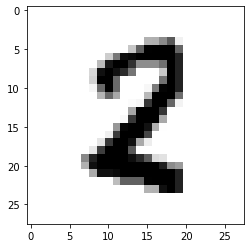

In [91]:
import random
import matplotlib.pyplot as plt

index = random.randint(0, 59999)
digit = source_images[index]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

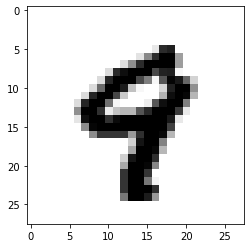

In [110]:
index_test = random.randint(0, 9999)
test_number = source_test_images[index_test]
test_image = test_images[index_test]
plt.imshow(test_number, cmap=plt.cm.binary)
plt.show()

In [111]:
import numpy as np

network.predict(np.reshape(test_image, (1, 28 * 28)))[0]

array([3.78895222e-12, 2.53457477e-09, 9.12979203e-07, 5.90924799e-07,
       2.77318351e-04, 1.13212423e-07, 1.44565766e-11, 7.33809998e-07,
       7.08646374e-03, 9.92633879e-01], dtype=float32)